# L2 Data Visualization Notebook

This report comprises the entire Data Visualization of the L2 data (Level 2 Data)  of the Hotel Recommendation system built. 

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
import boto3

In [58]:
CATEGORY = "L2"
CONTENT_SAVE_PATH = "../visualization_site/content/"
IMAGE_SAVE_PATH = CONTENT_SAVE_PATH + "images/"

class Article:
    _ids = {}
    def __init__(self, category:str = CATEGORY):
        self.category = category
        if category in Article._ids:
            Article._ids[category] += 1
        else:
            Article._ids[category] = 0
        self.id = Article._ids[category]
        self.title = ""
        self.body = ""
        self.img = []
    
    def get_uid(self):
        return f"{self.category}_{self.id:02d}"
    
    def add_img(self, filename):
        self.img.append(filename)

    @staticmethod 
    def md_title_only(string):
        return "<h1 class=\"entry-title\">" + string + "</h1>"

    @staticmethod 
    def md_img_str(filename):
        return f"![](../images/{filename})"

    @staticmethod 
    def md_tab_str(tab):
        return tab.to_markdown()

    def export(self):
        title_str = f"Title: {self.title}\n"
        date_str = f"Date: 2024-10-11 00:{(59-self.id):02d}\n" 
        category_str = f"Category: {self.category}\n"
        content_str = "\n" + self.body + "\n"

        images_str = "\n"
        for filename in self.img:
            images_str += f"{self.md_img_str(filename)}\n"
        images_str += "\n"
        
        # markdown_str = title_str + date_str + category_str + images_str + content_str
        markdown_str = title_str + date_str + category_str + content_str + images_str

        with open(f"{CONTENT_SAVE_PATH}{self.get_uid()}.md", "w", encoding="utf-8") as text_file:
            print(markdown_str, file=text_file)
        return markdown_str


In [59]:
# Set up boto3 client (this step is optional and not necessary for using s3fs directly)
s3_client = boto3.client('s3', region_name='us-west-2')

# Define bucket and object key
bucket_name = 'andorra-hotels-data-warehouse'
object_key = 'l2_data/text/l2_data_2024-08-20_07-54-25.parquet'

# Construct the S3 file path
s3_file_path = f's3://{bucket_name}/{object_key}'

# Load the Parquet file into a pandas DataFrame
df = pd.read_parquet(s3_file_path, engine='pyarrow', storage_options={'anon': False})

# Display the first few rows of the DataFrame
df_head = df.head()
df_head.style.hide()

region,hotel_name,avg_rating,user_ratings_total,review_rating,review_date_in_days,review_language,review_length,latitude,longitude,distance_to_ski_resort,distance_to_city_center
Ordino,Hotel l'Ermita B&B,4.600000,434,5.000000,90,ca,115,42.555741,1.590364,6.254811,7.786405
Ordino,Hotel Montecarlo Andorra,4.200000,680,5.000000,2190,en,103,42.532192,1.573854,5.561925,5.103837
Encamp,RESTAURANT CALIU D'EN JOSEP,4.700000,196,2.000000,1825,ru,15,42.536318,1.582748,6.034156,5.964927
Encamp,Hotel Encamp — Esquia a Andorra amb Forfett,4.000000,356,1.000000,150,pl,64,42.532077,1.574065,5.583211,5.111695
Andorra la Vella,HMC Caena,3.900000,168,5.000000,0,zh-cn,1,42.504456,1.515094,5.085974,0.616951


## 1. Distance to Ski resorts

Plot the minimum distance to a ski resort and its frequency. 

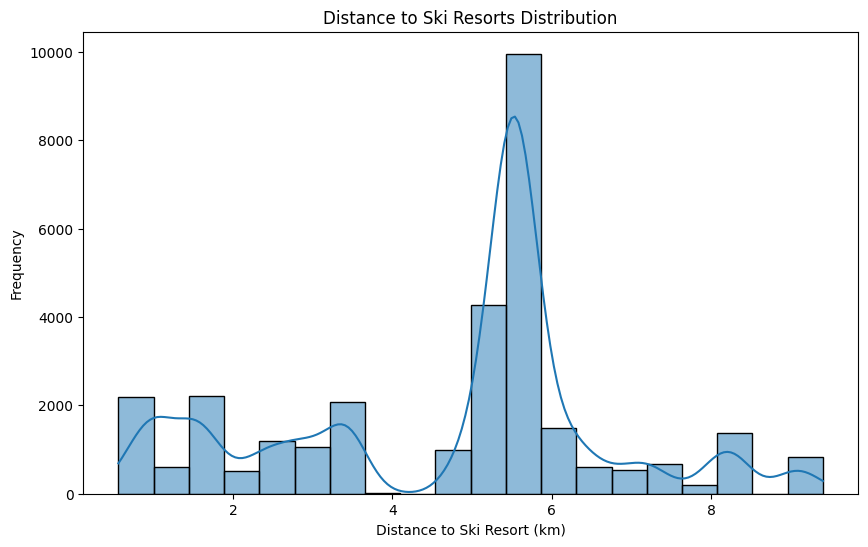

In [60]:
# Distance to Ski Resorts
plt.figure(figsize=(10, 6))
sns.histplot(df['distance_to_ski_resort'], bins=20, kde=True)
plt.title('Distance to Ski Resorts Distribution')
plt.xlabel('Distance to Ski Resort (km)')
plt.ylabel('Frequency')

article = Article()
article.title = Article.md_title_only("1. Distance to Ski Resorts")
article.body = "Plot the minimum distance to a ski resort and its frequency"
imgname = article.get_uid() + ".png"
plt.savefig(IMAGE_SAVE_PATH + imgname)
article.add_img(imgname)
article.export()
plt.show()


## 2. Distance to city center

Plot the minimum distance to the city center per hotel, and its frequency. 

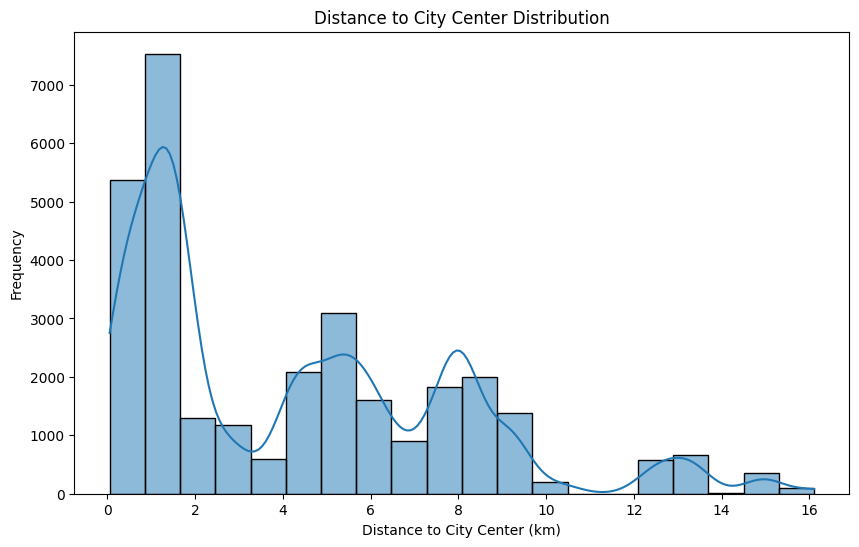

In [61]:
# Distance to City Center
plt.figure(figsize=(10, 6))
sns.histplot(df['distance_to_city_center'], bins=20, kde=True)
plt.title('Distance to City Center Distribution')
plt.xlabel('Distance to City Center (km)')
plt.ylabel('Frequency')

article = Article()
article.title = Article.md_title_only("2. Distance to city center")
article.body = "Plot the minimum distance to the city center per hotel, and its frequency"
imgname = article.get_uid() + ".png"
plt.savefig(IMAGE_SAVE_PATH + imgname)
article.add_img(imgname)
article.export()
plt.show()


## 3. Ratings vs Distance to Ski resort

Plot the average rating of a hotel based on the distance to a ski resort

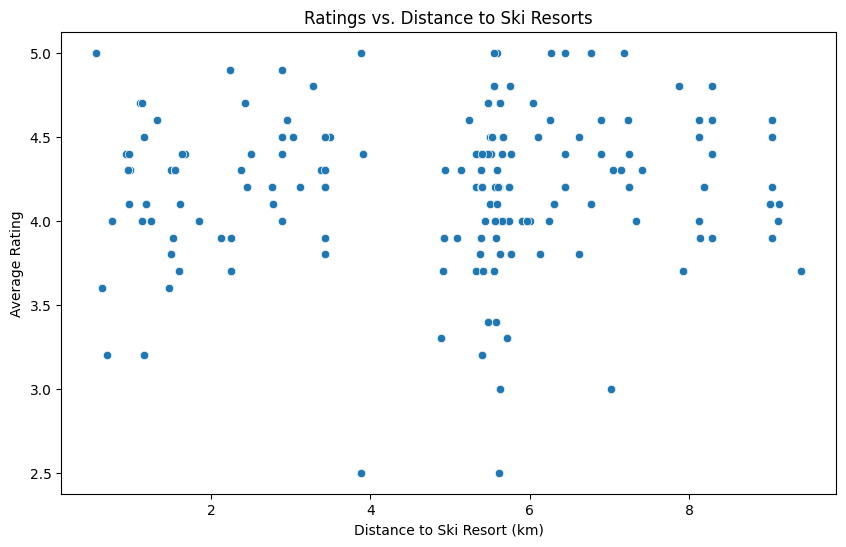

In [62]:
# Ratings vs. Distance to Ski Resorts
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='distance_to_ski_resort', y='avg_rating')
plt.title('Ratings vs. Distance to Ski Resorts')
plt.xlabel('Distance to Ski Resort (km)')
plt.ylabel('Average Rating')

article = Article()
article.title = Article.md_title_only("3. Ratings vs Distance to Ski resorts")
article.body = "Plot the average rating of a hotel based on the distance to a ski resort"
imgname = article.get_uid() + ".png"
plt.savefig(IMAGE_SAVE_PATH + imgname)
article.add_img(imgname)
article.export()
plt.show()


## 4. Ratings vs Distance to city center

Plot the average rating of a hotel based on the distance to the city center

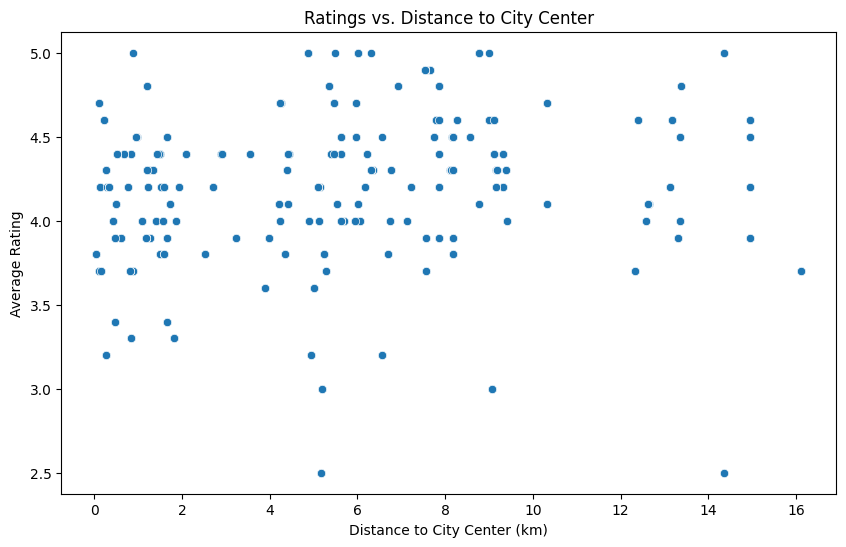

In [63]:
# Ratings vs. Distance to City Center
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='distance_to_city_center', y='avg_rating')
plt.title('Ratings vs. Distance to City Center')
plt.xlabel('Distance to City Center (km)')
plt.ylabel('Average Rating')

article = Article()
article.title = Article.md_title_only("4. Ratings vs Distance to city center")
article.body = "Plot the average rating of a hotel based on the distance to the city center"
imgname = article.get_uid() + ".png"
plt.savefig(IMAGE_SAVE_PATH + imgname)
article.add_img(imgname)
article.export()
plt.show()